### unsupervised-learning-kmeans

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

## Example with generated data

Problem: customer segmentation for a marketing campaign of an app. For a group of 20 people, we have their age and their weekly hours of app usage
Question might be: Which people to treat with same campaign as they are probably similar to each other?

In [15]:
age = [20, 22, 24, 24, 25, 28, 29, 34, 36, 38, 39, 41, 42, 44, 56, 57, 61, 62, 63, 63]
hours = [12, 10, 11.2, 12.3, 12.4, 13.5, 14, 8, 7, 6, 7.2, 5.6, 6.7, 6.2, 5, 4.2, 3, 2, 1]

In [16]:
# creating a dataframe
df = pd.DataFrame(zip(age, hours), columns = ['age', 'hours'])
df.head()

,age,hours
0,20,12.0
1,22,10.0
2,24,11.2
3,24,12.3
4,25,12.4


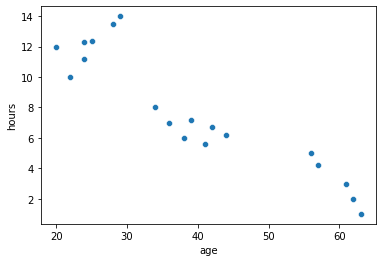

In [17]:
# plotting the data
sns.scatterplot(x = df['age'], y = df['hours'])
plt.show()

#### Using two clusters

In [11]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for 

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
# depends on data or maybe also on goals I want to reach.

KMeans(n_clusters=3)

In [20]:
# Predicting / assigning the clusters:
df_cl = df
#kmeans.predict(df)
df_cl['clusters'] = kmeans.predict(df) #creating a new variable which includes predcited clusters
df_cl


,age,hours,clusters
0,20,12.0,0
1,22,10.0,0
2,24,11.2,0
3,24,12.3,0
4,25,12.4,0
5,28,13.5,0
6,29,14.0,0
7,34,8.0,2
8,36,7.0,2
9,38,6.0,2


In [21]:
# Check the size of the clusters
print(df_cl['clusters'].value_counts().sort_index())

0    7
1    5
2    7
Name: clusters, dtype: int64


[0 1 2]


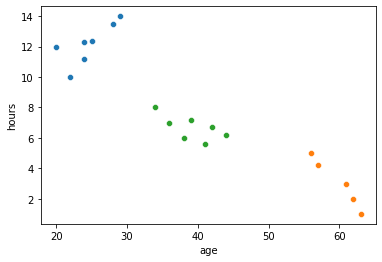

In [22]:
clusterval = np.unique(df['clusters'])
print(clusterval)
for cluster in clusterval:
    sns.scatterplot(x = df_cl[df_cl['clusters']==cluster]['age'], y = df_cl[df_cl['clusters']==cluster]['hours'])
plt.show()

#### Using different number of clusters - Repeat all steps from before with the different values for k

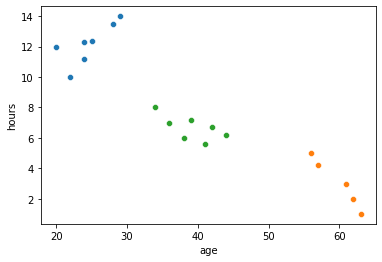

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

df_cl['clusters'] = kmeans.predict(df)

clusterval = np.unique(df['clusters'])
for cluster in clusterval:
    sns.scatterplot(x = df_cl[df_cl['clusters']==cluster]['age'], y = df_cl[df_cl['clusters']==cluster]['hours'])
plt.show()